<h1 style="color : red; font-size : 50px">Weacher Prediction</h1>


## import the package we will use


In [689]:
# import packages
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.axis import Axis
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
np.set_printoptions(threshold=sys.maxsize)

## load our dataset


In [690]:
# load data set which it about rain in australia
data = pd.read_csv(r'weatherAUS.csv')
# print first 5 row in data
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [691]:
# show columns name in data
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [692]:
# take copy of data
df=data

In [693]:
# change a value of RainTomorrow and RainToday to 1 if = Yes and 0 if = No
df["RainTomorrow"] = [1 if each == "Yes" else 0 for each in df["RainTomorrow"]]
df["RainToday"] = [1 if each == "Yes" else 0 for each in df["RainToday"]]

## drop irrelevant data


In [694]:
# drop data from data because it don't help us
df=df.drop(['Date'],axis=1)

## handle missing value


In [695]:
# get info about data like dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   Evaporation    82670 non-null   float64
 5   Sunshine       75625 non-null   float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  135197 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   143693 non-null  float64
 11  WindSpeed3pm   142398 non-null  float64
 12  Humidity9am    142806 non-null  float64
 13  Humidity3pm    140953 non-null  float64
 14  Pressure9am    130395 non-null  float64
 15  Pressure3pm    130432 non-null  float64
 16  Cloud9am       89572 non-null   float64
 17  Cloud3pm       86102 non-null

In [696]:
# check the number of na in data
df.isna().sum()

Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday            0
RainTomorrow         0
dtype: int64

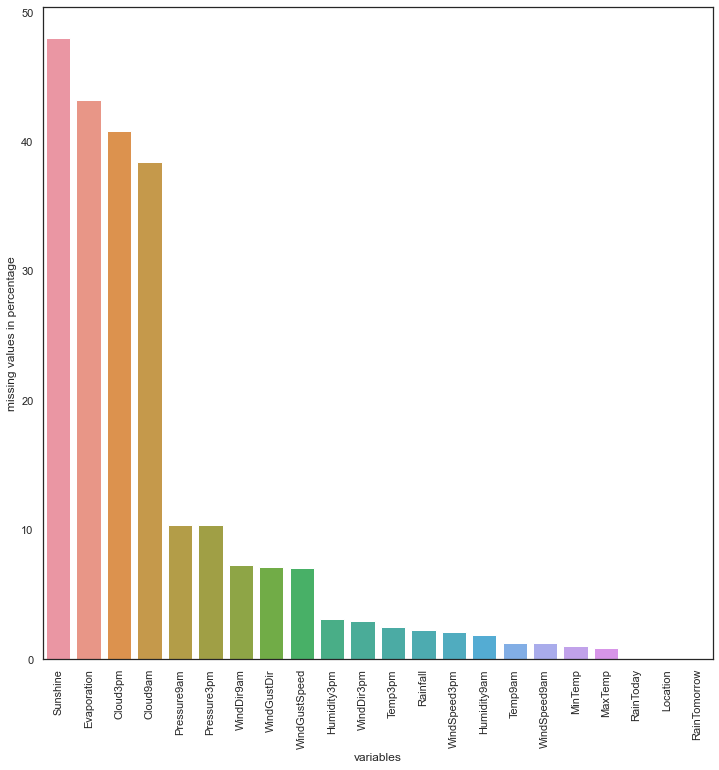

In [697]:
# missing values
missing_value = 100 * df.isnull().sum()/len(df)
missing_value = missing_value.reset_index()
missing_value.columns = ['variables','missing values in percentage']
missing_value = missing_value.sort_values('missing values in percentage',ascending=False)

# barplot
plt.figure(figsize=(12,12))
g = sns.barplot(x = missing_value['variables'], y = missing_value['missing values in percentage'])
g.set_xticklabels(g.get_xticklabels(),rotation = 90)
plt.show()

In [698]:
# drop Evaporation,Sunshine,Cloud9am and Cloud3pm because the na is more than the half 
df =df.drop(['Evaporation','Sunshine','Cloud9am','Cloud3pm'],axis=1)
# make list to catagorical,numrical and other columns
cat_cols = []
num_cols = []
other_cols = []
# check which columns are catagorical or numrical or other
for i in df.columns:
    if df[i].dtype == "object":
        cat_cols.append(i)
    elif df[i].dtype == "float64":
        num_cols.append(i)
    else:
        other_cols.append(i)
# drop na from our target because we don't want any problem in train and test      
df=df.dropna(axis=0,subset=['RainTomorrow','RainToday'])
# fill catagorical columns with mode
for i in cat_cols:
    df[i].fillna(value=df[i].mode()[0],inplace=True)
# fill numrical columns with median
for k in num_cols:
    df[k].fillna(value=df[k].median(),inplace=True)

In [699]:
print(num_cols)
print(cat_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']


In [700]:
# check if there is na after remove
df.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [701]:
# get the count and and mean and 5 number summary of each column
df.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,12.192053,23.215962,2.307990,39.962189,14.030751,18.669758,68.901251,51.553396,1017.644768,1015.250115,16.987101,21.668916,0.219167,0.219146
std,6.365780,7.088358,8.389771,13.120931,8.861796,8.716716,18.855360,20.471345,6.728484,6.663994,6.449299,6.850658,0.413683,0.413669
min,-8.500000,-4.800000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,-7.200000,-5.400000,0.000000,0.000000
25%,7.700000,18.000000,0.000000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.100000,12.300000,16.700000,0.000000,0.000000
50%,12.000000,22.600000,0.000000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,16.700000,21.100000,0.000000,0.000000
75%,16.800000,28.200000,0.600000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,21.500000,26.200000,0.000000,0.000000
max,33.900000,48.100000,371.000000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,40.200000,46.700000,1.000000,1.000000


In [702]:
# know the number of rows and columns
df.shape

(145460, 18)

## Visualization


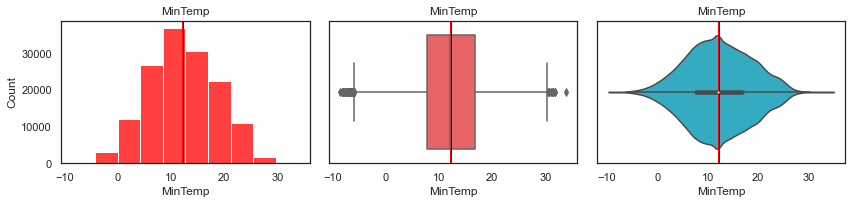

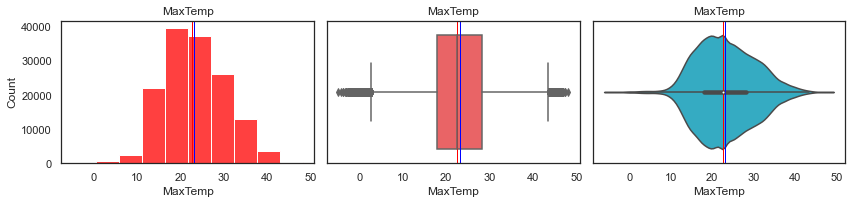

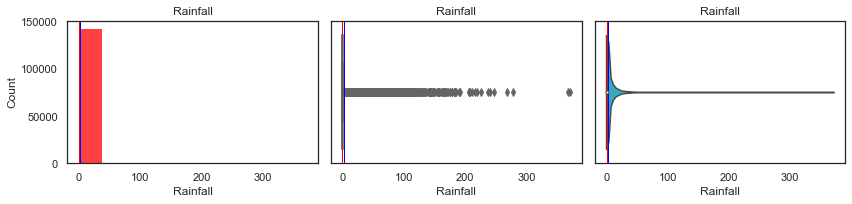

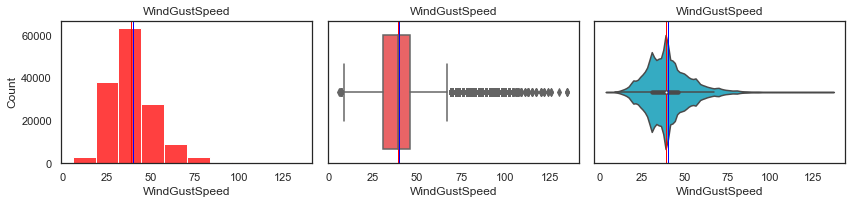

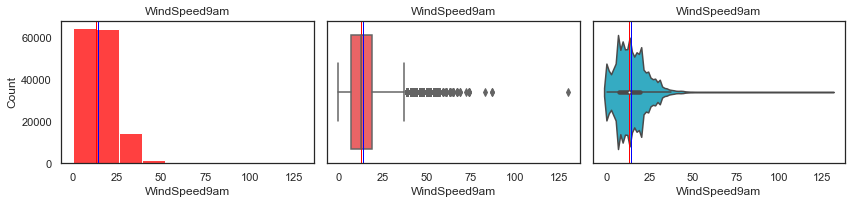

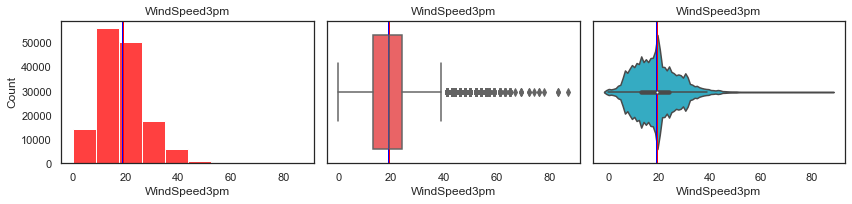

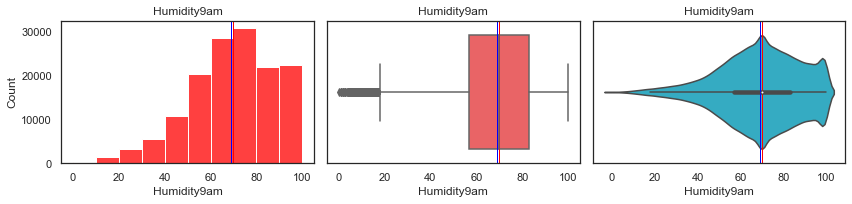

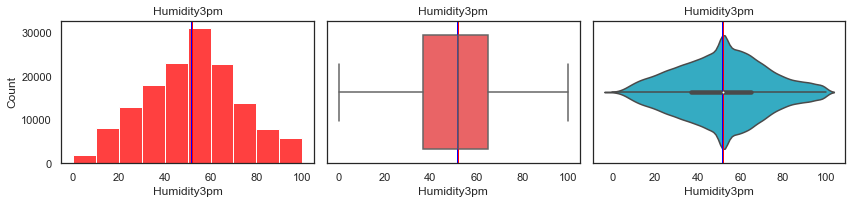

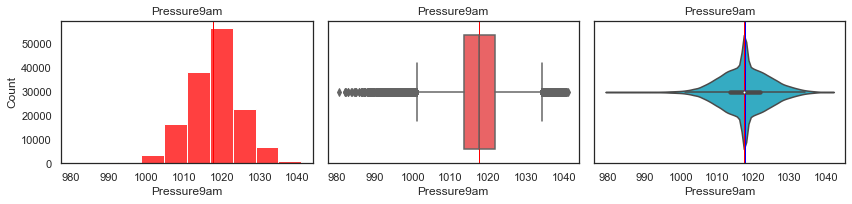

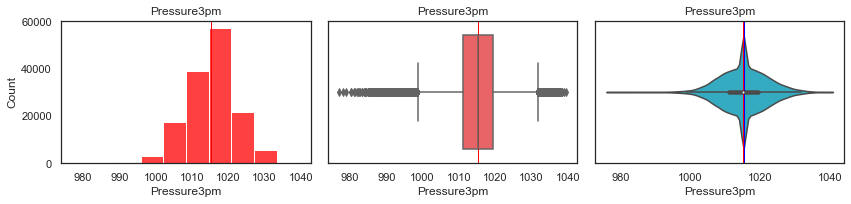

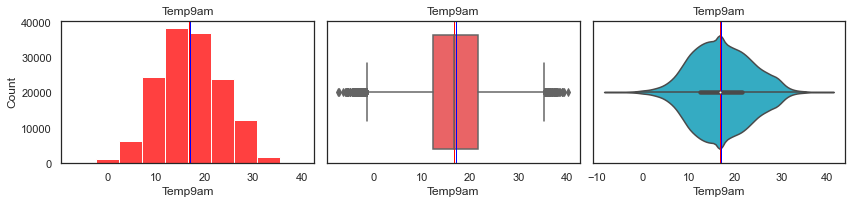

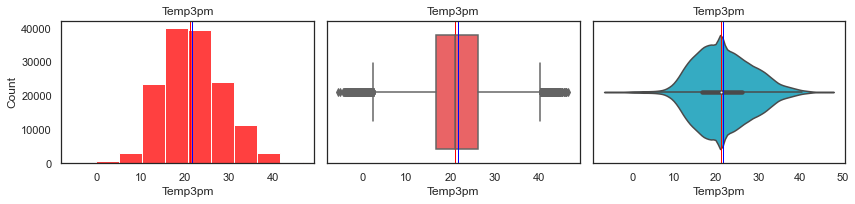

In [703]:
# plot histplot and boxplot and violinplot to all numrical features to know skewness
for i in num_cols:
   
    fig, ax = plt.subplots(1,3,figsize=(12, 3))

    sns.set_style('white')
    sns.set_context(context = 'notebook',font_scale=1)

    sns.histplot(x=df[i],bins=10,color='red',kde=False,ax=ax[0]);
    sns.boxplot(x=df[i], ax = ax[1],color='#ff4e50');
    sns.violinplot(x=df[i],bins=10,color='#1ebbd9',ax=ax[2]);  
    
    ax[0].title.set_text(i);
    ax[1].title.set_text(i);
    ax[2].title.set_text(i);     
        
    ax[0].axvline(df[i].mean(), color='b', linewidth=1)
    ax[1].axvline(df[i].mean(), color='b', linewidth=1)
    ax[2].axvline(df[i].mean(), color='b', linewidth=1)
        
    ax[0].axvline(df[i].median(), color='r', linewidth=1)
    ax[1].axvline(df[i].median(), color='r', linewidth=1)
    ax[2].axvline(df[i].median(), color='r', linewidth=1)
    
    plt.tight_layout()    

In [704]:
# Function for visualization of categorical features
def ctgplt(variable,to):
    var = df[variable]
    values=var.value_counts()
    
    f, ax = plt.subplots(figsize = (12,12))
    g = sns.barplot(x = variable, y = to, data = df)
    g.set_xticklabels(g.get_xticklabels(),rotation = 90)
    plt.show()

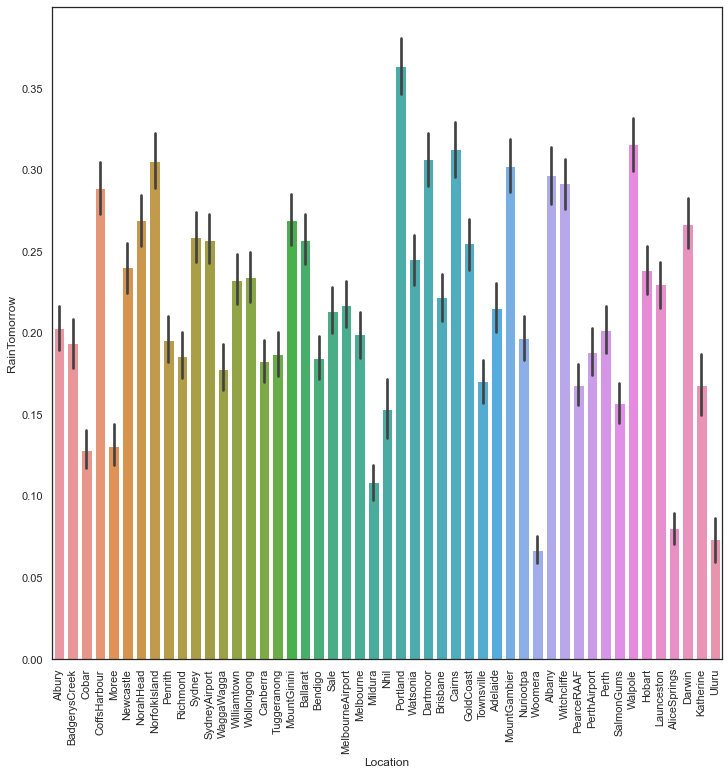

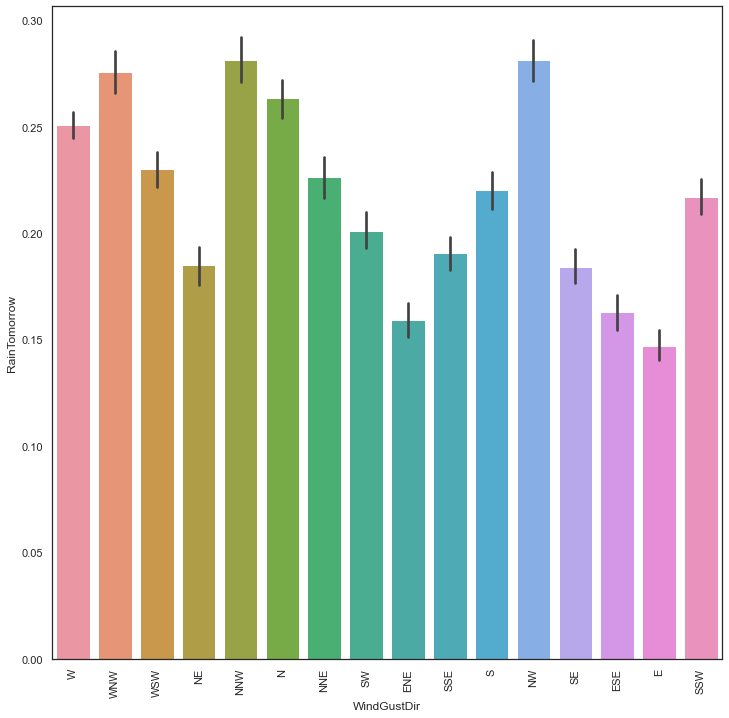

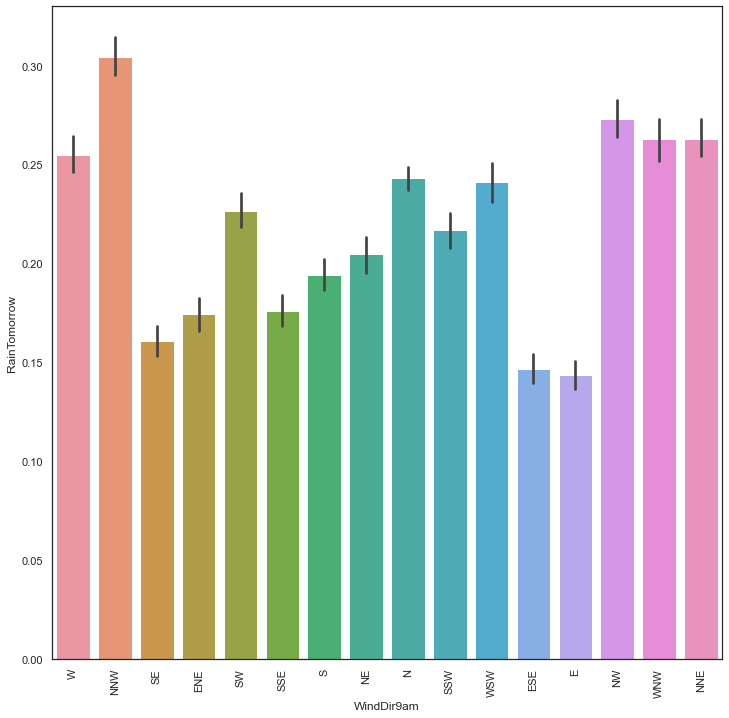

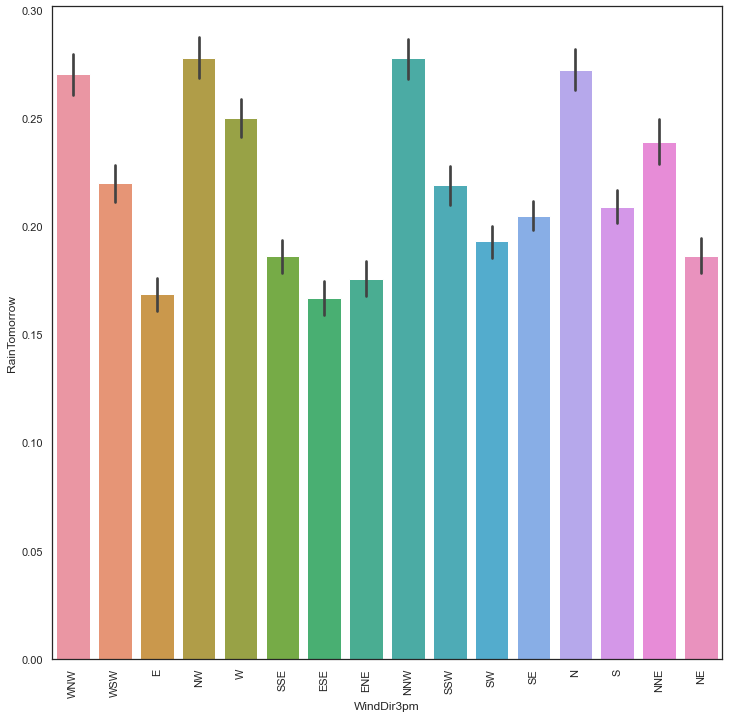

In [705]:
# bar plot between categorical data and RainTomorrow
for i in cat_cols:
    ctgplt(i, "RainTomorrow")

## detection and remove outliers


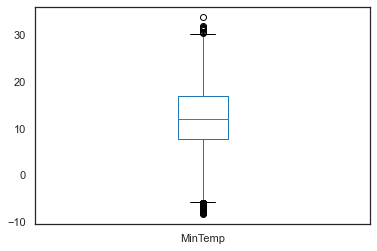

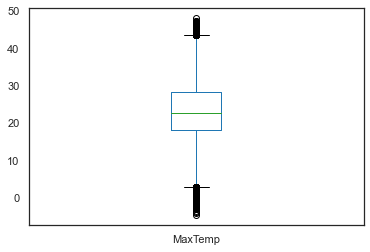

In [706]:
# detection if there is outlier using boxplot
def box_plot(data,feature):
    data.boxplot(column=[feature])
    plt.grid(False)
    plt.show()
box_plot(df,'MinTemp')
box_plot(df,'MaxTemp')

In [707]:
# method to get the index of outliers
def outliers(data,feature):
    Q1= data[feature].quantile(0.25)
    Q3= data[feature].quantile(0.75)
    IQR= Q3-Q1
    lower= Q1-1.5*IQR
    upper= Q3+1.5*IQR
    outlier= data.index[(data[feature]<lower) | (data[feature]>upper)]
    return outlier

In [708]:
# save the index or outliers in list named outlier
outlier=[]
for feature in num_cols:
    outlier.extend(outliers(df,feature))

In [709]:
# method to remove the outlier
def remove(data,outlier):
    outlier=sorted(set(outlier))
    data = data.drop(outlier)
    return data

In [710]:
# remove outlier from the data
df =remove(df,outlier)

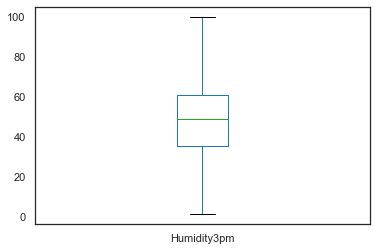

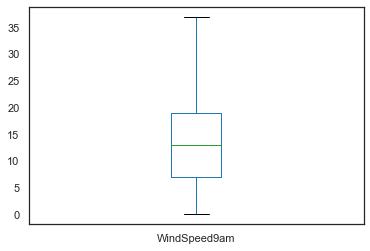

In [711]:
# box plot after remove outliers
box_plot(df,'Humidity3pm')
box_plot(df,'WindSpeed9am')

In [712]:
# get number of rows afer remove the outliers
df.shape

(108029, 18)

In [713]:
# get the count and and mean and 5 number summary of each column after remove the outliers
df.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,108029.000000,108029.000000,108029.000000,108029.000000,108029.000000,108029.000000,108029.000000,108029.000000,108029.000000,108029.000000,108029.000000,108029.000000,108029.000000,108029.000000
mean,11.963318,23.891871,0.102784,37.525766,12.949736,17.704820,66.633348,48.308389,1018.488475,1015.836213,17.173619,22.358104,0.024688,0.149154
std,6.347131,6.685311,0.271186,10.442607,7.868914,7.718722,17.583896,18.916048,5.914551,5.924498,6.281269,6.441343,0.155173,0.356242
min,-5.900000,2.800000,0.000000,9.000000,0.000000,0.000000,18.000000,1.000000,1001.100000,998.700000,-1.400000,2.500000,0.000000,0.000000
25%,7.400000,18.900000,0.000000,30.000000,7.000000,13.000000,55.000000,35.000000,1014.800000,1012.000000,12.700000,17.700000,0.000000,0.000000
50%,11.900000,23.400000,0.000000,37.000000,13.000000,17.000000,67.000000,49.000000,1017.600000,1015.200000,16.900000,21.700000,0.000000,0.000000
75%,16.500000,28.700000,0.000000,44.000000,19.000000,22.000000,79.000000,61.000000,1022.400000,1019.700000,21.600000,26.800000,0.000000,0.000000
max,30.200000,43.500000,1.500000,67.000000,37.000000,39.000000,100.000000,100.000000,1034.200000,1031.800000,35.100000,40.400000,1.000000,1.000000


## drop duplicates data


In [714]:
df=df.drop_duplicates()

## feature selection using correlation


<AxesSubplot:>

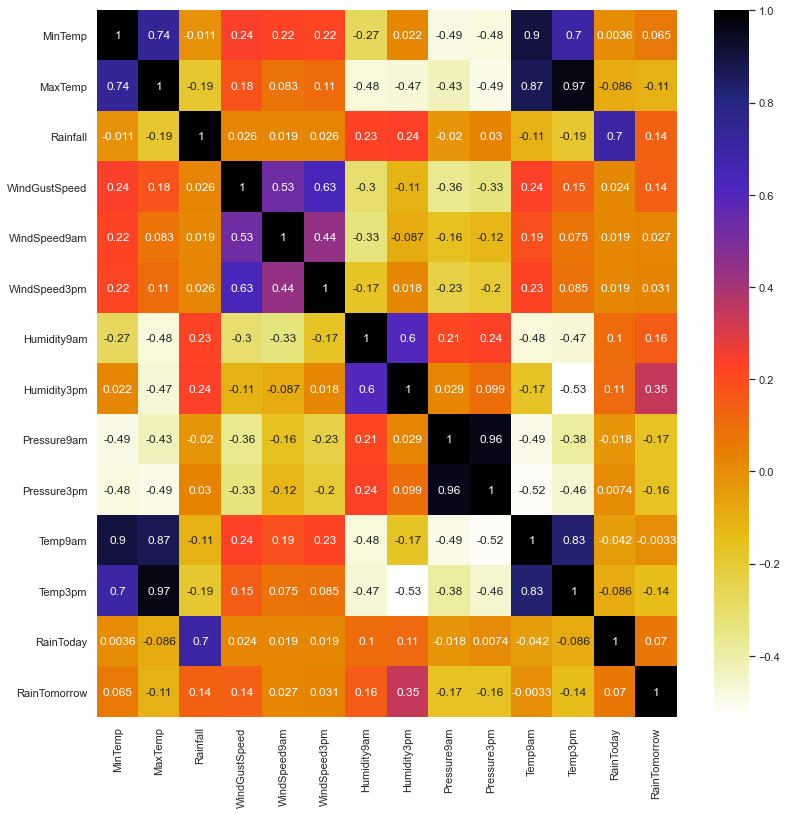

In [715]:
# get correlation between columns and represent as heat map
feature=df[num_cols]
cor=df.corr()
plt.figure(figsize=(13,13))
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)

In [716]:
# method to get the columns which correlation is bigger than or equal the rate or smaller than or equal -rate 
def correlation(data,rate):
    col_cor=set()
    cor=data.corr()
    for i in range(len(cor.columns)):
        for j in range(i):
            if((cor.iloc[i,j])>=rate) | ((cor.iloc[i,j])<=-rate) :
                col_cor.add(cor.columns[i])
    return col_cor

In [717]:
#get the columns which correlation is bigger than or equal 0.8 or smaller than or equal -0.8
feature=df[num_cols]
corr_fet=correlation(feature,0.8)
print(corr_fet)
#drop these columns
df=df.drop(corr_fet,axis=1)

{'Pressure3pm', 'Temp9am', 'Temp3pm'}


<AxesSubplot:>

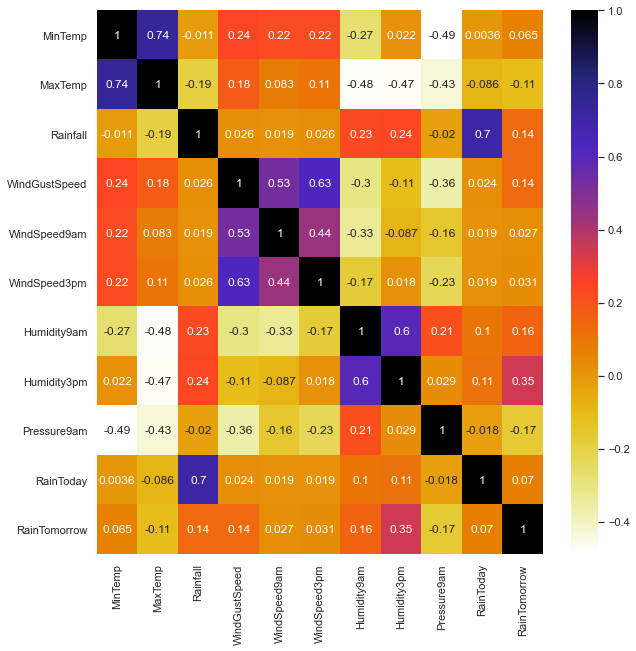

In [718]:
# correlation heat plot after drop feature bigger than or equal 0.8 or smaller than or equal -0.8
cor = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)

In [719]:
# show first 5 rows of data after feature selection
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,0,0
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,0,0
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,0,0
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,0,0
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,0,0


## discretization continuous columns


In [720]:
# split continuous to 9 bins
for i in ['MinTemp','MaxTemp','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am']:
    df[i]=pd.qcut(x=df[i],q=9,labels=False)

In [721]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,RainToday,RainTomorrow
0,Albury,5,4,0.6,W,6,W,WNW,7,6,5,0,0,0,0
1,Albury,2,5,0.0,WNW,6,NNW,WSW,0,6,0,1,0,0,0
2,Albury,5,5,0.0,WSW,7,W,WSW,6,7,0,1,0,0,0
3,Albury,3,6,0.0,NE,0,SE,E,3,0,0,0,3,0,0
4,Albury,7,7,1.0,W,5,ENE,NW,1,5,7,1,0,0,0


## change catagorical columns numrical


In [722]:
from category_encoders import TargetEncoder
encoder = TargetEncoder()

In [723]:
# get percent of every location value to RainTomorrow=1
df['Location_encoder']=encoder.fit_transform(X=df['Location'],y=df['RainTomorrow'])

In [724]:
# get percent of every WindGustDir value to RainTomorrow=1
encoder = TargetEncoder()
df['WGD_encoder']=encoder.fit_transform(X=df['WindGustDir'],y=df['RainTomorrow'])

In [725]:
# get percent of every WindDir9am value to RainTomorrow=1
encoder = TargetEncoder()
df['WD9_encoder']=encoder.fit_transform(X=df['WindDir9am'],y=df['RainTomorrow'])

In [726]:
# get percent of every WindDir3pm value to RainTomorrow=1
encoder = TargetEncoder()
df['WD3_encoder']=encoder.fit_transform(X=df['WindDir3pm'],y=df['RainTomorrow'])

In [727]:
# print first 5 rows after preprocessing
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,RainToday,RainTomorrow,Location_encoder,WGD_encoder,WD9_encoder,WD3_encoder
0,Albury,5,4,0.6,W,6,W,WNW,7,6,5,0,0,0,0,0.145025,0.176415,0.159149,0.186651
1,Albury,2,5,0.0,WNW,6,NNW,WSW,0,6,0,1,0,0,0,0.145025,0.194627,0.221758,0.129860
2,Albury,5,5,0.0,WSW,7,W,WSW,6,7,0,1,0,0,0,0.145025,0.141605,0.159149,0.129860
3,Albury,3,6,0.0,NE,0,SE,E,3,0,0,0,3,0,0,0.145025,0.141836,0.100518,0.115760
4,Albury,7,7,1.0,W,5,ENE,NW,1,5,7,1,0,0,0,0.145025,0.176415,0.128209,0.201923


In [728]:
# remove categorical columns
df=df.drop(['Location','WindGustDir','WindDir9am','WindDir3pm'],axis=1)

In [729]:
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,RainToday,RainTomorrow,Location_encoder,WGD_encoder,WD9_encoder,WD3_encoder
0,5,4,0.6,6,7,6,5,0,0,0,0,0.145025,0.176415,0.159149,0.186651
1,2,5,0.0,6,0,6,0,1,0,0,0,0.145025,0.194627,0.221758,0.129860
2,5,5,0.0,7,6,7,0,1,0,0,0,0.145025,0.141605,0.159149,0.129860
3,3,6,0.0,0,3,0,0,0,3,0,0,0.145025,0.141836,0.100518,0.115760
4,7,7,1.0,5,1,5,7,1,0,0,0,0.145025,0.176415,0.128209,0.201923


## Balanced Data


In [730]:
df.RainTomorrow.value_counts()

0    91633
1    16108
Name: RainTomorrow, dtype: int64

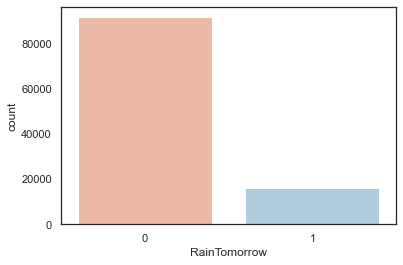

In [731]:
# plot to know count of 0 ,1 in RainTomorrow
sns.countplot(x = "RainTomorrow", data=df, palette = "RdBu")
plt.show()

In [732]:
# get count of 0 in df_0_count and count of 1 in df_1_count of RainTomorrow
df_0_count , df_1_count=df.RainTomorrow.value_counts()
df_0=df[df['RainTomorrow']==0]
df_1=df[df['RainTomorrow']==1]

In [733]:
# get sample of RainTomorrow =0 equal RainTomorrow=1 count 
df_0_under=df_0.sample(int(df_1_count*1.5))
balance_df=pd.concat([df_0_under,df_1],axis=0)

In [734]:
balance_df.RainTomorrow.value_counts()

0    24162
1    16108
Name: RainTomorrow, dtype: int64

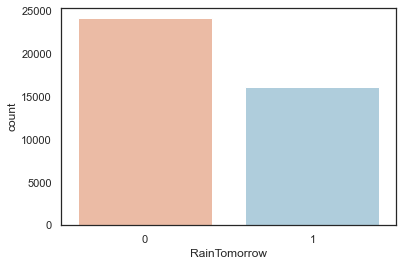

In [735]:
sns.countplot(x = "RainTomorrow", data=balance_df, palette = "RdBu")
plt.show()

In [736]:
balance_df.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,RainToday,RainTomorrow,Location_encoder,WGD_encoder,WD9_encoder,WD3_encoder
51628,2,3,0.0,4,1,0,7,3,7,0,0,0.145515,0.206702,0.174079,0.209209
39699,1,0,0.0,7,8,7,3,2,6,0,0,0.175081,0.176415,0.174079,0.186651
54810,0,0,0.0,2,3,0,8,7,3,0,0,0.159757,0.141836,0.128209,0.187963
66234,1,5,0.0,2,1,1,3,1,7,0,0,0.156234,0.174114,0.100518,0.187963
53641,0,0,0.0,8,6,0,8,8,3,0,0,0.159757,0.104573,0.097423,0.110395


## Model with unbalanced data


In [737]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [738]:
# sprate features and target
x=df.drop(['RainTomorrow'],axis=1)
y=df['RainTomorrow']

In [739]:
#split data to 80% train and 20% test
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y)

In [740]:
# scaler the data using minmax scaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

In [741]:
x_train=pd.DataFrame(x_train,columns=X_train.columns)
x_test=pd.DataFrame(x_test,columns=X_test.columns)

## KNN Model unbalanced


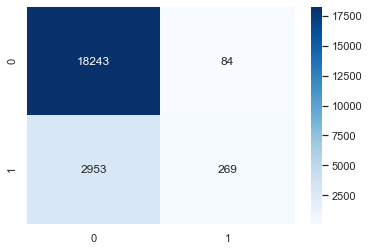

              precision    recall  f1-score   support

           0       0.86      1.00      0.92     18327
           1       0.76      0.08      0.15      3222

    accuracy                           0.86     21549
   macro avg       0.81      0.54      0.54     21549
weighted avg       0.85      0.86      0.81     21549

KNN Accuracy:  0.8590653858647733


In [742]:
# import knn
from sklearn.neighbors import KNeighborsClassifier
# put number of k
knn = KNeighborsClassifier(int((len(x_train)**(0.5))/2))
# fit the KNN model in our train data
knn.fit(x_train,y_train)
# predict the test data
predict=knn.predict(x_test)
# show confusion matrix
mat=confusion_matrix(y_test, predict)
sns.heatmap(mat,annot=True,fmt="g",cmap='Blues')
plt.show()
print(classification_report(y_test, predict))
# show Accuracy of KNN model
print("KNN Accuracy: ",accuracy_score(y_test, predict))

## Decision tree model unbalanced


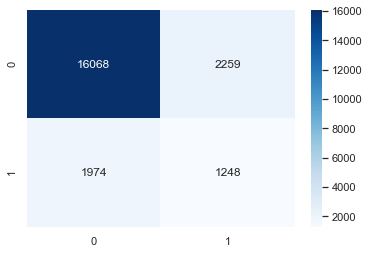

              precision    recall  f1-score   support

           0       0.89      0.88      0.88     18327
           1       0.36      0.39      0.37      3222

    accuracy                           0.80     21549
   macro avg       0.62      0.63      0.63     21549
weighted avg       0.81      0.80      0.81     21549

Decision tree Accuracy:  0.8035639704858694


In [743]:
# import Decision tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
# fit the Decision tree model in our train data
dt.fit(x_train,y_train)
# predict the test data
predictions = dt.predict(x_test)
# show confusion matrix
dat=confusion_matrix(y_test, predictions)
sns.heatmap(dat,annot=True,fmt="g",cmap='Blues')
plt.show()
print(classification_report(y_test, predictions))
# show Accuracy of Decision tree model
print("Decision tree Accuracy: ",accuracy_score(y_test, predictions))

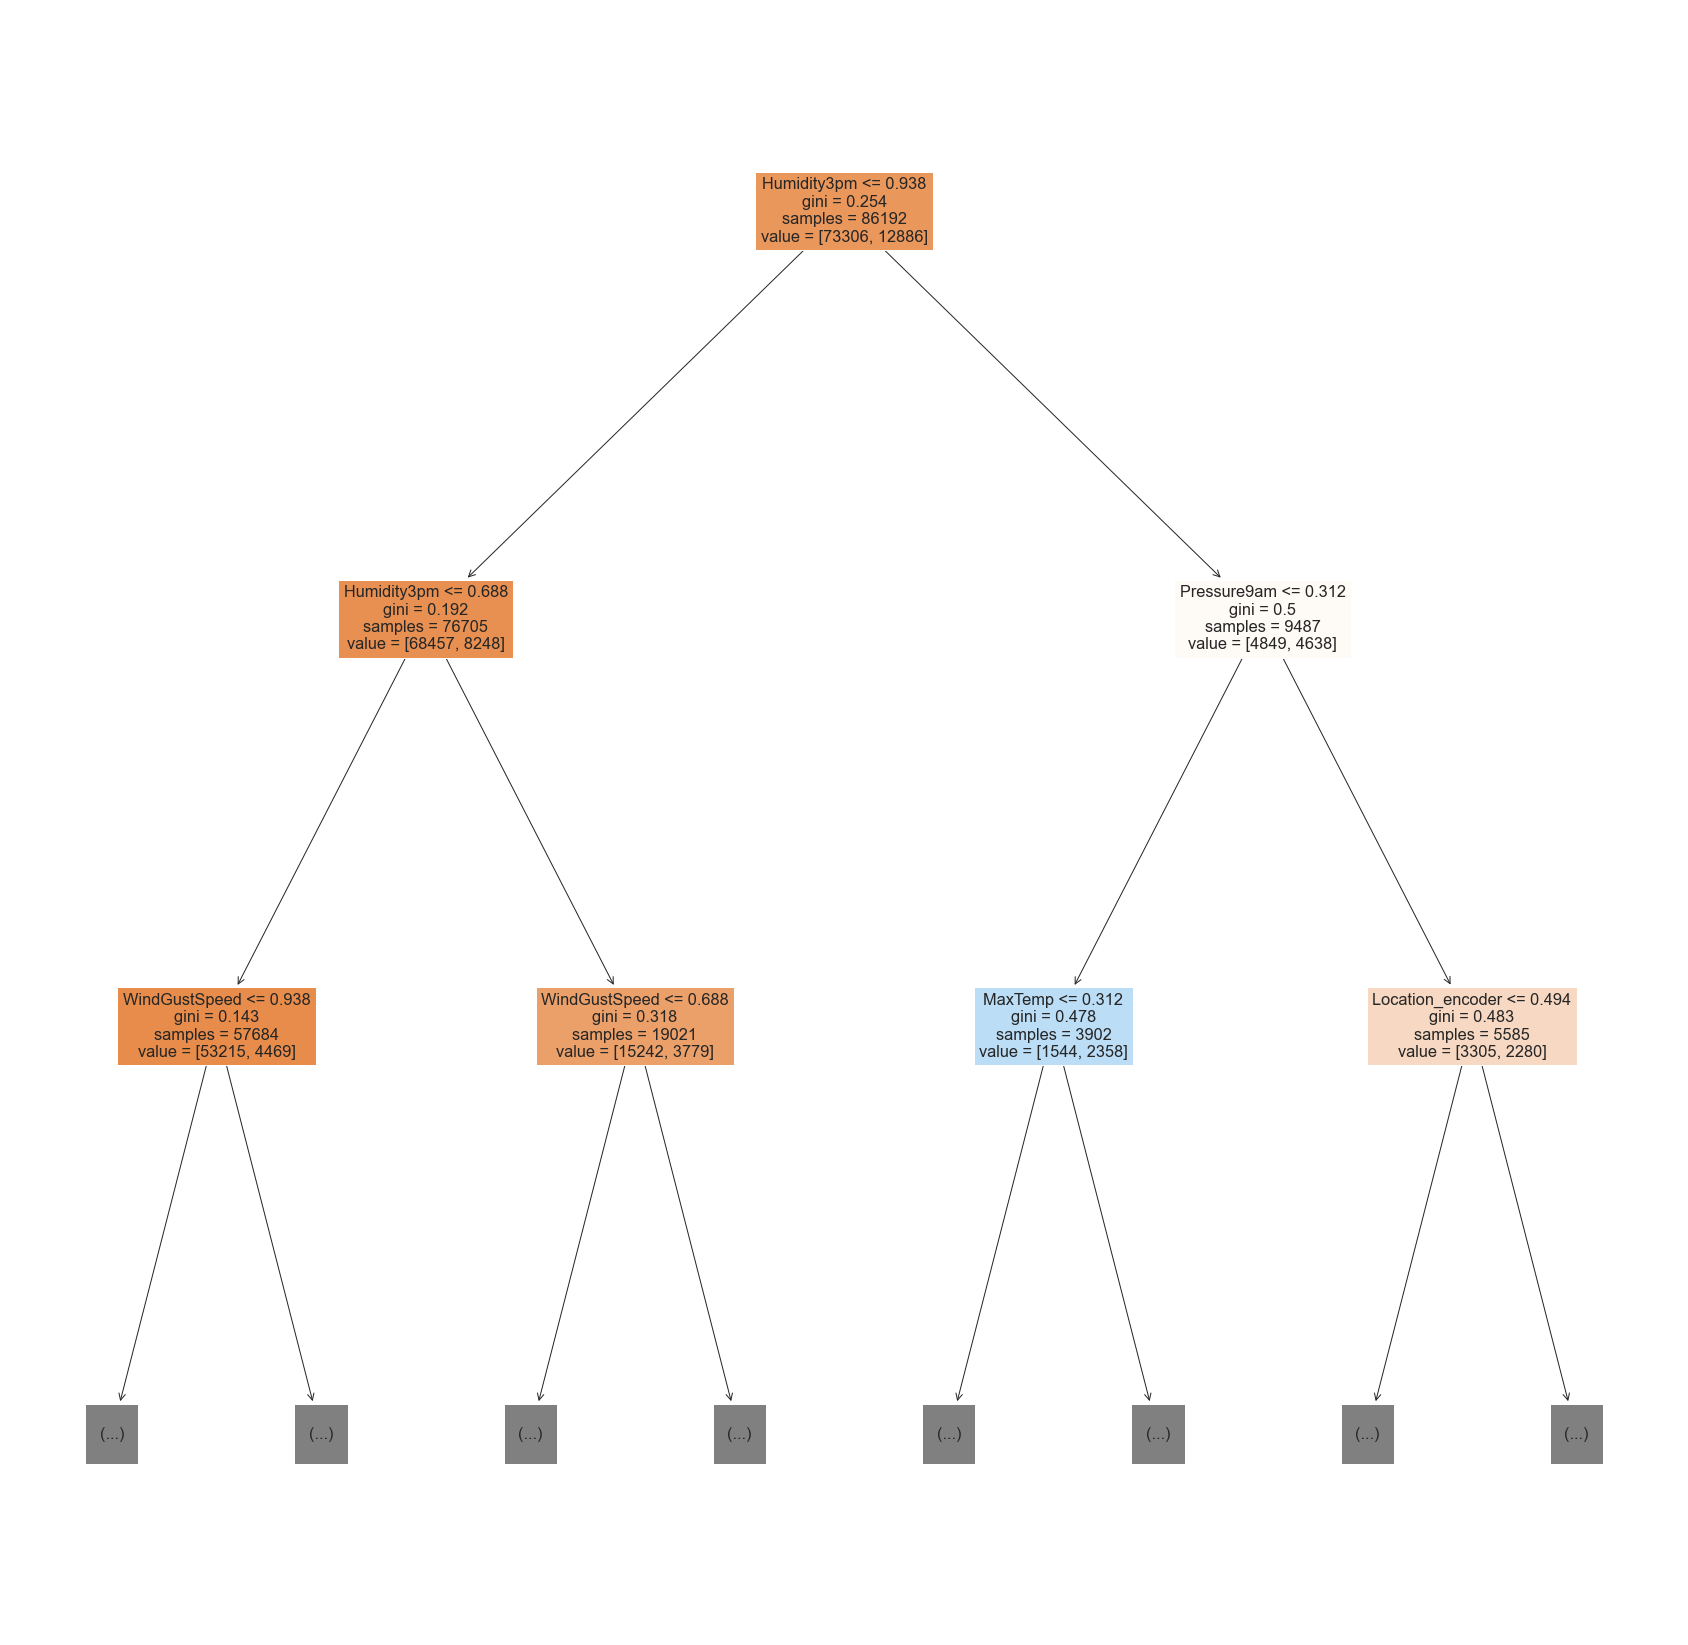

In [744]:
# plot 2 depth of Decision tree
from sklearn import tree
plt.figure(figsize=(30,30))
tree.plot_tree(dt,max_depth=2,feature_names=x_train.columns,filled=True)
plt.show()

## Naive Bayes Model unbalanced


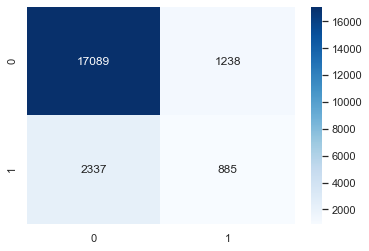

              precision    recall  f1-score   support

           0       0.88      0.93      0.91     18327
           1       0.42      0.27      0.33      3222

    accuracy                           0.83     21549
   macro avg       0.65      0.60      0.62     21549
weighted avg       0.81      0.83      0.82     21549

Naive Bayes Accuracy:  0.8340990301174068


In [745]:
# import Naive Bayes
from sklearn.naive_bayes import GaussianNB
nav = GaussianNB()
# fit the Naive Bayes model in our train data
nav.fit(x_train,y_train)
# predict the test data
y_pr=nav.predict(x_test)
# show confusion matrix
nv=confusion_matrix(y_test, y_pr)
sns.heatmap(nv,annot=True,fmt="g",cmap='Blues')
plt.show()
print(classification_report(y_test, y_pr))
# show Accuracy of Naive Bayes model 
print("Naive Bayes Accuracy: ",accuracy_score(y_test, y_pr))

## Model with balanced data


In [746]:
# balance data using oversampling
from imblearn.over_sampling import SMOTE
x_res, y_res = SMOTE().fit_resample(x, y)

In [747]:
#split resample data to 80% train and 20% test
X_res_train,X_res_test,y_res_train,y_res_test=train_test_split(x_res,y_res,test_size=0.2,stratify=y_res)

In [748]:
# scaler the resample data using minmax scaler
sc = MinMaxScaler()
x_res_train = sc.fit_transform(X_res_train)
x_res_test = sc.transform(X_res_test)

In [749]:
x_res_train=pd.DataFrame(x_res_train,columns=X_res_train.columns)
x_res_test=pd.DataFrame(x_res_test,columns=X_res_test.columns)

## KNN Model balanced


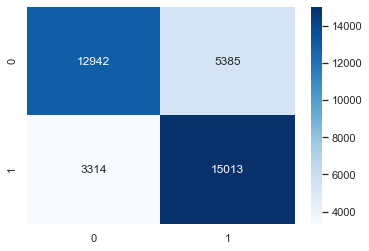

              precision    recall  f1-score   support

           0       0.80      0.71      0.75     18327
           1       0.74      0.82      0.78     18327

    accuracy                           0.76     36654
   macro avg       0.77      0.76      0.76     36654
weighted avg       0.77      0.76      0.76     36654

KNN Accuracy:  0.7626725596115022


In [750]:
knn = KNeighborsClassifier(int((len(x_res_train)**(0.5))/2))
# fit the KNN model in our resample train data
knn.fit(x_res_train,y_res_train)
# predict the test data
pr=knn.predict(x_res_test)
# show confusion matrix
mat=confusion_matrix(y_res_test, pr)
sns.heatmap(mat,annot=True,fmt="g",cmap='Blues')
plt.show()
print(classification_report(y_res_test, pr))
# show Accuracy of KNN model
print("KNN Accuracy: ",accuracy_score(y_res_test, pr))

## Decision tree model balanced


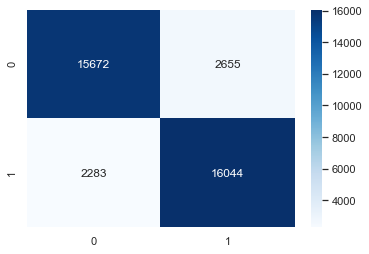

              precision    recall  f1-score   support

           0       0.87      0.86      0.86     18327
           1       0.86      0.88      0.87     18327

    accuracy                           0.87     36654
   macro avg       0.87      0.87      0.87     36654
weighted avg       0.87      0.87      0.87     36654

Decision tree Accuracy:  0.8652807333442462


In [751]:
dt = DecisionTreeClassifier()
# fit the Decision tree model in our resample train data
dt.fit(x_res_train,y_res_train)
# predict the test data
predictions = dt.predict(x_res_test)
dat=confusion_matrix(y_res_test, predictions)
sns.heatmap(dat,annot=True,fmt="g",cmap='Blues')
plt.show()
print(classification_report(y_res_test, predictions))
# show Accuracy Decision tree model
print("Decision tree Accuracy: ",accuracy_score(y_res_test, predictions))

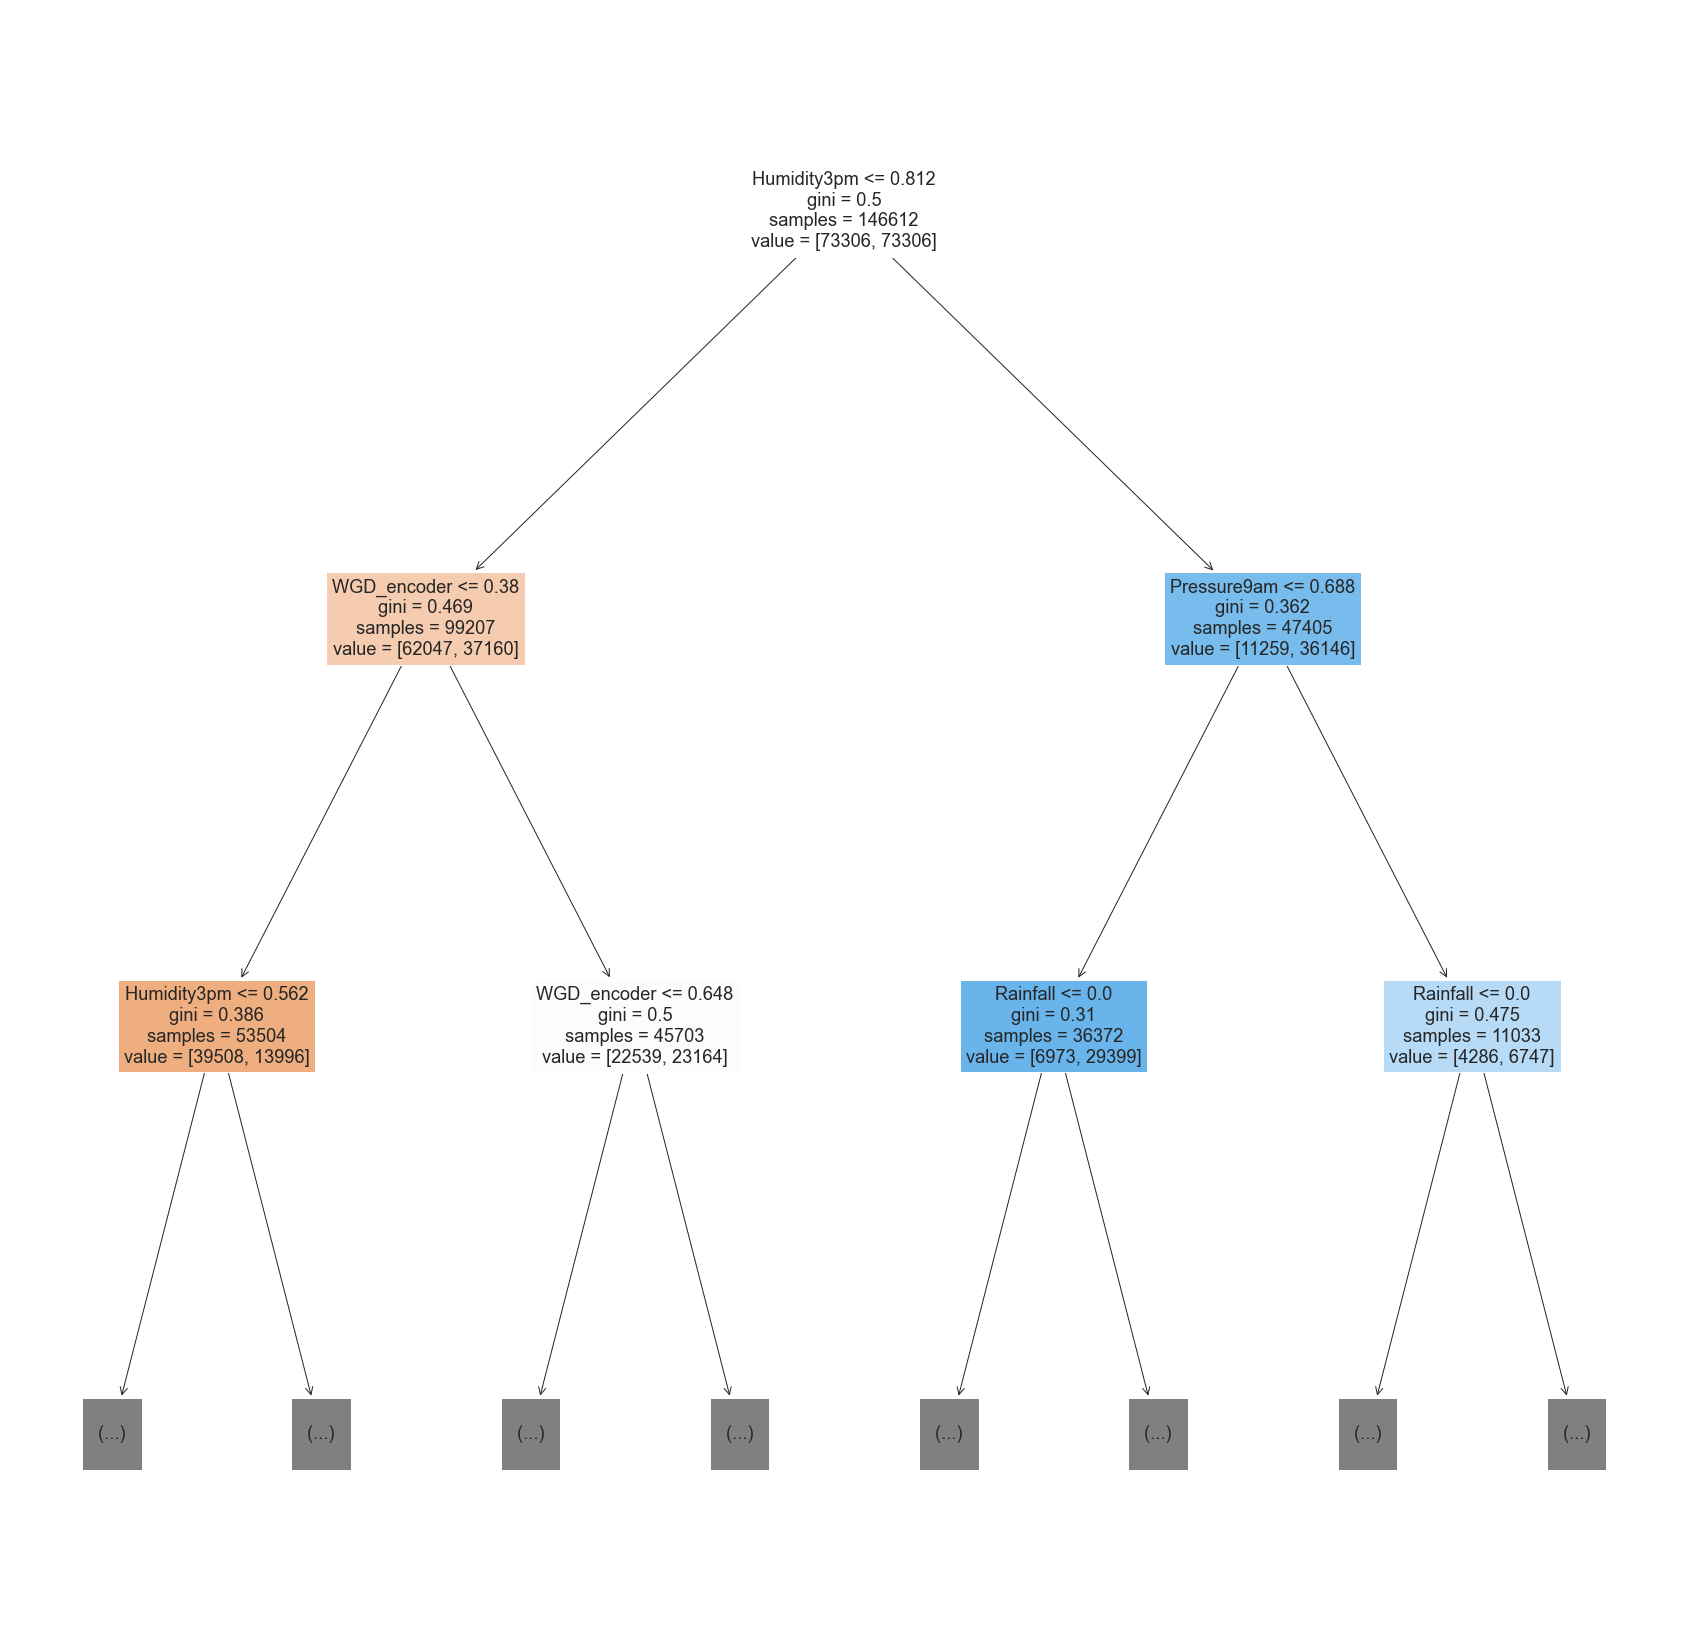

In [752]:
# plot 2 depth of Decision tree
plt.figure(figsize=(30,30))
tree.plot_tree(dt,max_depth=2,feature_names=x_res_train.columns,filled=True)
plt.show()

## Naive Bayes Model balanced


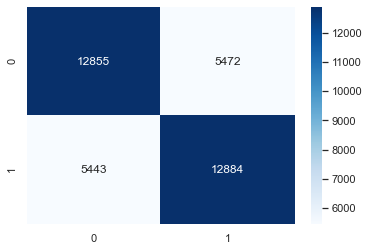

              precision    recall  f1-score   support

           0       0.70      0.70      0.70     18327
           1       0.70      0.70      0.70     18327

    accuracy                           0.70     36654
   macro avg       0.70      0.70      0.70     36654
weighted avg       0.70      0.70      0.70     36654

Naive Bayes Accuracy:  0.7022153107437115


In [753]:
nav = GaussianNB()
# fit the model in our train data
nav.fit(x_res_train,y_res_train)
# predict the test data
y_pr=nav.predict(x_res_test)
# show confusion matrix
nv=confusion_matrix(y_res_test, y_pr)
sns.heatmap(nv,annot=True,fmt="g",cmap='Blues')
plt.show()
print(classification_report(y_res_test, y_pr))
# show Accuracy of Naive Bayes model
print("Naive Bayes Accuracy: ",accuracy_score(y_res_test, y_pr))